<a href="https://colab.research.google.com/github/abhisheknagpure8/stock_price_prediction/blob/main/Minor_Project_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Price Prediction



# **Problem Statement**


The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [206]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Dataset Loading

In [207]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
df = pd.read_csv('/content/drive/MyDrive/CORIZO---Data-Science-main/Mini Project/1729258-1613615-Stock_Price_data_set_(1).csv')

### Dataset First View

In [209]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Dataset Rows & Columns count

In [210]:
# Dataset Rows & Columns count
print(f'Dataset Rows are {df.shape[0]} and Columns are {df.shape[1]}.')

Dataset Rows are 1009 and Columns are 7.


### Dataset Information

In [211]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


#### Duplicate Values

In [212]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [213]:
# Missing Values/Null Values Count
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

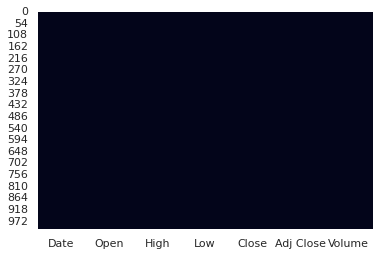

In [214]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The Dataset contains 1009 rows and 7 columns.The Dataset has 0 duplicates values. Also, the above dataset contains no null values.

## ***2. Understanding Your Variables***

In [215]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [216]:
# Dataset Describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Variables Description 

'Date': - Information of a stock from date  '2018-02-05' to '2022-02-04'.

'Open': - Price of a stock when market opened on particular day.

'High': -Highest price at which stock traded during the period.

'Low': -Lowest price at which stock traded during the period.

'Close': - Price of a stock when market closed on a day

'Adj Close': -Calculation adjustment made to the stock closing price.It is more accurate then closing price.

'Volume: - Total amount of trading activity during period of time.

### Check Unique Values for each variable.

In [217]:
# Check Unique Values for each variable.
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [218]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date'])

In [219]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [220]:
df.Date.max()

Timestamp('2022-02-04 00:00:00')

In [221]:
df.Date.min()

Timestamp('2018-02-05 00:00:00')

In [222]:
print(f'The Data contains data price between {df.Date.min()} to {df.Date.max()}')

The Data contains data price between 2018-02-05 00:00:00 to 2022-02-04 00:00:00


## ***4. Data Vizualization: -***

#### Chart - 1 - Date vs Open price of stock.

In [224]:
import plotly.express as px
fig = px.line(df, x=df['Date'], y=df['Open'], )
fig.update_layout(title={'text': "Date vs Open price of stock", 'x': 0.55})
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays data with the help of symbols above a number line showing the frequency of each value. It is used to organize the data in a simple way and is very easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

We can see that, even though there are sudden ups and downs, the values are mostly continuous. Hence, we might be able to estimate the future Open values using the previous values as features.

#### Chart - 2 - Date vs Volume of stock.

In [225]:
import plotly.express as px
fig = px.line(df, x=df['Date'], y=df['Volume'], )
fig.update_layout(title={'text': "Date vs Volume of stock", 'x': 0.55})
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

##### 1. Why did you pick the specific chart?

A line plot is a graph that displays data with the help of symbols above a number line showing the frequency of each value. It is used to organize the data in a simple way and is very easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

We can see that the Volume contains many sudden changes. Hence, it may not be useful in predicting the future 'Open' values.

#### Chart - 3 Correlation Heatmap

<Axes: >

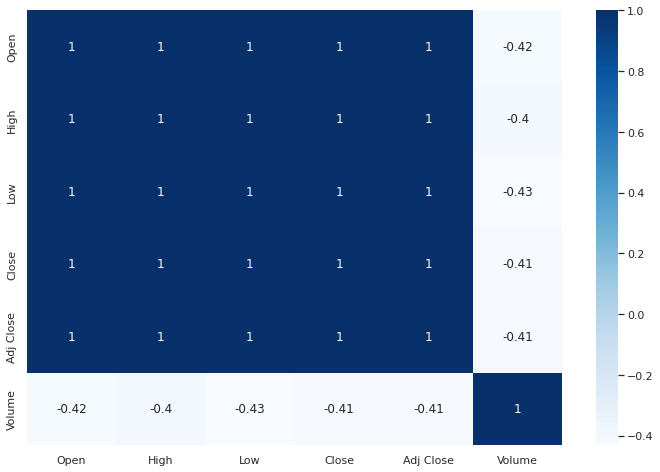

In [226]:
# Chart - 3 visualization code
# Plot the Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [227]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


##### 1. Why did you pick the specific chart?

To visualise the multicollinearity of the numeric veriables. 

##### 2. What is/are the insight(s) found from the chart?

* The columns Close and Adj Close have a perfect positive ralationship 
(correlation of +1).
* The columns Open, High, Low and Close are highly correlated.
* The Volume column is not correlated to any other columns.

#### Chart - 4 Boxplot between columns

<Axes: >

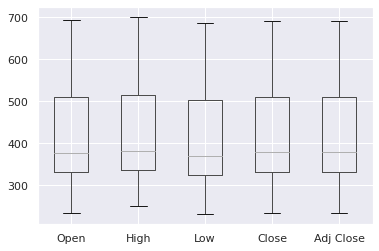

In [228]:
# Chart - 4 visualization code
df.boxplot(column = ['Open','High','Low','Close','Adj Close']) 
#df[['Open','High','Low','Close','Adj Close','Volume']].plot(kind='box')

##### 1. Why did you pick the specific chart?

A boxplot, also known as a box and whisker plot, is a graphical representation of the distribution of a dataset. It is used to visualize the spread and skewness of a dataset, as well as to identify outliers.

##### 2. What is/are the insight(s) found from the chart?

Here i didn't find any outliers present in the dataset .Hence we are good to go.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Data Splitting

In [229]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Creating the dataset for independent and dependent variables
X = np.array(df.index).reshape(-1,1)
y= df['Open']

In [230]:
X.shape

(1009, 1)

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [232]:
#Shape of the train set of the independent values
X_train.shape

(706, 1)

In [233]:
#Shape of the test set of the independent values
X_test.shape

(303, 1)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 2. Data Scaling

In [234]:
#Scaling your data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?


Standard scaler is the method used to scale the data. In this method the data is transformed such a way that

their μ = 0 and standard deviation = 1.

## ***6. ML Model Implementation***

In [235]:
# ML Model Implementation
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [236]:
#Training the model
model.fit(X_train,y_train)

LinearRegression()

In [237]:
#Predicting the values
y_pred = model.predict(X_test)

Evalution Graph: 


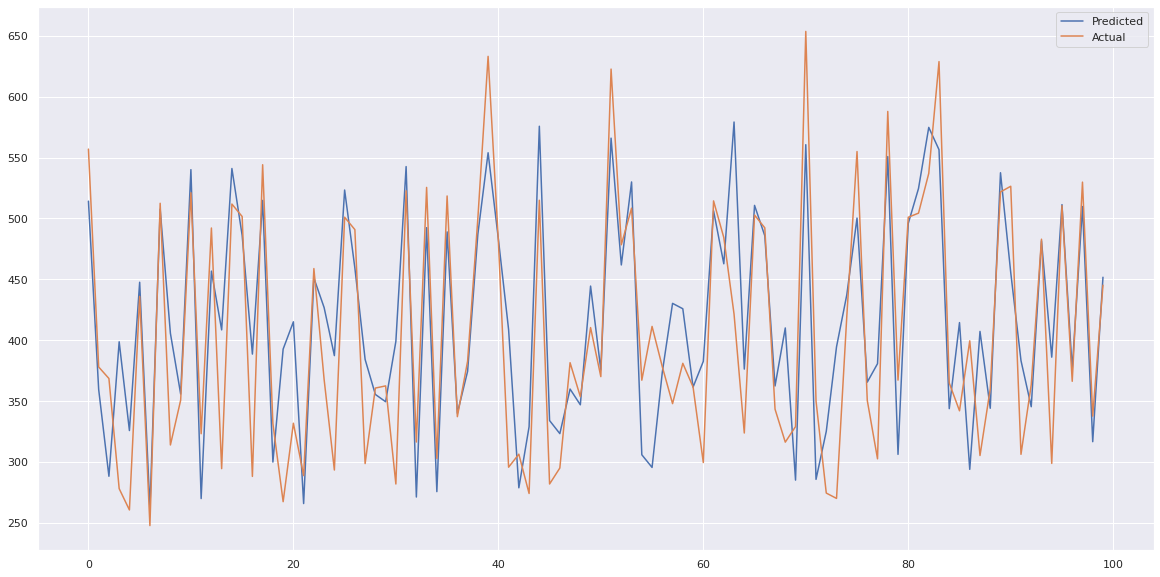

In [238]:
#Ploting the line graph of actual and predicted values
print('Evalution Graph: ')  
plt.figure(figsize=(20,10))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [239]:
#Finding mean_squared_error
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

#Finding the r2 score
r2 = r2_score(y_test**2,y_pred**2)
print("R2 :" ,r2)

#Finding the adjusted r2 score
adj_r2=1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 3340.8812063875716
R2 : 0.722088455738288
Adjusted R2 :  0.7211651615713055


I used Linear Regression algorithm to create the model. I found mean squared error as 3340.88, R2 as 72.2% and Adjusted R2 as 72.11%.

# **Conclusion**

This project provides insights for investors to make informed decisions about buying and selling stocks, identifying patterns in stock prices and market trends, and improving the overall efficiency of the financial markets.

We analysed a dataset on stock prices and built a model that takes the Close values of past days and predict the next Open value. We also observed that the model performs reasonably well, unless there are any sudden ups and downs.